In [108]:
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv('data.csv', engine='python')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


In [109]:
def percent_sick_leave(gender):
    data_sick = data[data['Количество больничных дней'] > 2]['Количество больничных дней'].count()
    data_gender_sick = data[(data['Пол'] == gender) & (data['Количество больничных дней'] > 2)]['Пол'].count()
    division = data_gender_sick / data_sick
    return division

print('Процент женщин, воспользовавшихся больничным более 2-х раз: {:.1%}'.format(percent_sick_leave('Ж')))
print('Процент мужчин, воспользовавшихся больничным более 2-х раз: {:.1%}'.format(percent_sick_leave('М')))

Процент женщин, воспользовавшихся больничным более 2-х раз: 44.4%
Процент мужчин, воспользовавшихся больничным более 2-х раз: 55.6%


       Количество больничных дней    Возраст
count                   67.000000  67.000000
mean                     4.238806  40.029851
std                      1.268375   6.457249
min                      3.000000  23.000000
25%                      3.000000  36.000000
50%                      4.000000  40.000000
75%                      5.000000  44.500000
max                      8.000000  55.000000
       Количество больничных дней    Возраст
count                   84.000000  84.000000
mean                     4.333333  39.869048
std                      1.475367   7.055340
min                      3.000000  23.000000
25%                      3.000000  35.000000
50%                      4.000000  41.000000
75%                      5.000000  45.000000
max                      8.000000  57.000000


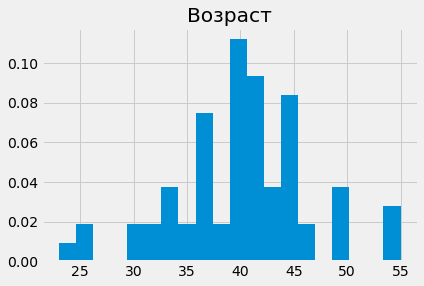

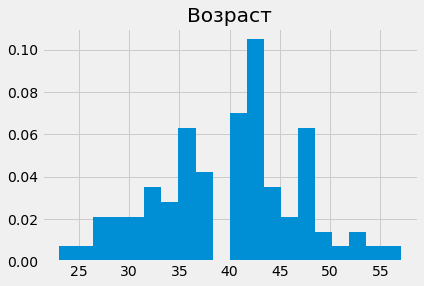

In [110]:
data_women = data[(data['Пол'] == 'Ж') & (data['Количество больничных дней'] > 2)]
print(data_women.describe())
data_women.hist(column='Возраст', bins=20, density=True)
data_men = data[(data['Пол'] == 'М') & (data['Количество больничных дней'] > 2)]
data_men.hist(column='Возраст', bins=20, density=True)
print(data_men.describe())

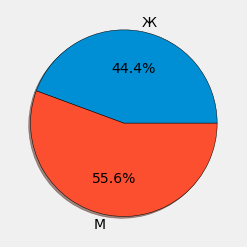

In [111]:
plt.style.use('fivethirtyeight')
plt.pie([percent_sick_leave('Ж'), percent_sick_leave('М')],
       labels = ['Ж','М'],
       shadow = True,
       autopct = '%1.1f%%',
       wedgeprops = {'edgecolor':'black'})
plt.show()

In [112]:
data_sick = data[data['Количество больничных дней'] > 2]['Количество больничных дней'].count()
data_young_sick = data[(data['Возраст'] < 35) & (data['Количество больничных дней'] > 2)]['Возраст'].count()
division_1 = data_young_sick / data_sick
print('Процент работников младше 35 лет, воспользовавшихся больничным более 2-х раз: {:.1%}'.format(division_1))

data_elder_sick = data[(data['Возраст'] >= 35) & (data['Количество больничных дней'] > 2)]['Возраст'].count()
division_2 = data_elder_sick / data_sick
print('Процент работников старше 35 лет, воспользовавшихся больничным более 2-х раз: {:.1%}'.format(division_2))

Процент работников младше 35 лет, воспользовавшихся больничным более 2-х раз: 20.5%
Процент работников старше 35 лет, воспользовавшихся больничным более 2-х раз: 79.5%


<AxesSubplot:xlabel='Возраст'>

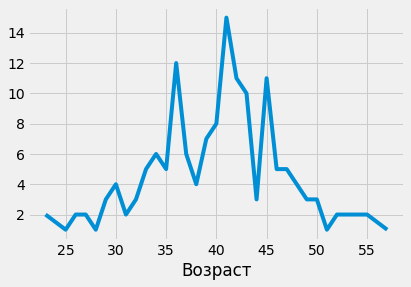

In [113]:
data_45 = data[data['Количество больничных дней']>2].groupby('Возраст')['Количество больничных дней'].count()
data_45.plot()

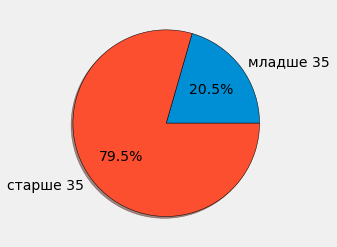

In [114]:
plt.style.use('fivethirtyeight')
plt.pie([division_1, division_2],
       labels = ['младше 35','старше 35'],
       shadow = True,
       autopct = '%1.1f%%',
       wedgeprops = {'edgecolor':'black'})
plt.show()

In [115]:
print('Из {} сотрудников {} пропустили более 2-х рабочих дней по болезни'.format(len(data), data_sick))
print('из них {} моложе 35 лет, {} старше 35 лет'.format(data_young_sick, data_elder_sick))

Из 237 сотрудников 151 пропустили более 2-х рабочих дней по болезни
из них 31 моложе 35 лет, 120 старше 35 лет
